Epoch [100/1000], Loss: 0.1721
Epoch [200/1000], Loss: 0.0817
Epoch [300/1000], Loss: 0.0406
Epoch [400/1000], Loss: 0.0198
Epoch [500/1000], Loss: 0.0097
Epoch [600/1000], Loss: 0.0051
Epoch [700/1000], Loss: 0.0030
Epoch [800/1000], Loss: 0.0020
Epoch [900/1000], Loss: 0.0014
Epoch [1000/1000], Loss: 0.0010
Test Accuracy: 0.97
Class 0: Precision: 0.98, Recall: 0.98, F1 Score: 0.98
Class 1: Precision: 0.98, Recall: 0.99, F1 Score: 0.99
Class 2: Precision: 0.97, Recall: 0.96, F1 Score: 0.97
Class 3: Precision: 0.97, Recall: 0.98, F1 Score: 0.97
Class 4: Precision: 0.97, Recall: 0.97, F1 Score: 0.97
Class 5: Precision: 0.97, Recall: 0.96, F1 Score: 0.97
Class 6: Precision: 0.98, Recall: 0.97, F1 Score: 0.97
Class 7: Precision: 0.97, Recall: 0.96, F1 Score: 0.97
Class 8: Precision: 0.96, Recall: 0.96, F1 Score: 0.96
Class 9: Precision: 0.97, Recall: 0.97, F1 Score: 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
          

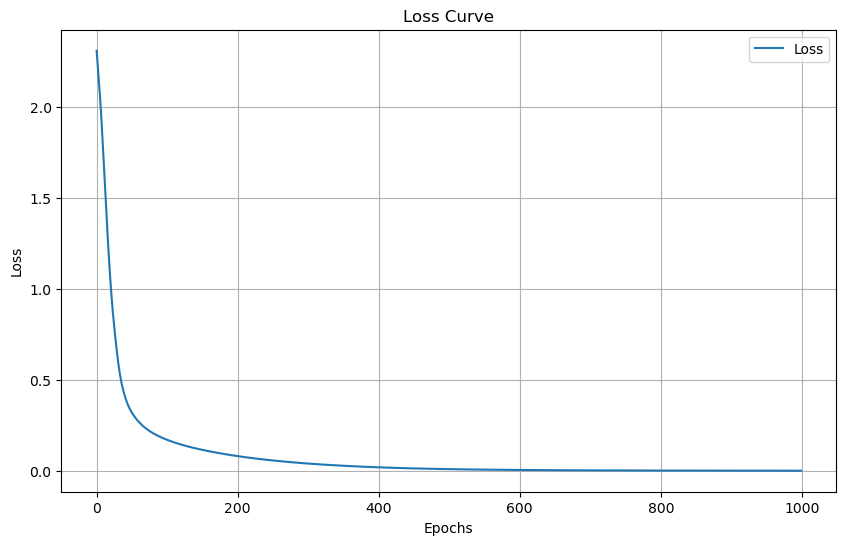

In [11]:
#multilayer perceptron

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# read data into model
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# define input and output of the training data
y_train = train_data.iloc[:, 0]
X_train = train_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

# convert to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# mlp model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 100)  # x -> h1
        self.fc2 = nn.Linear(100, 50)  # h1 -> h2
        self.fc3 = nn.Linear(50, 10)     # h2 -> y

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#initialize model
model = MLP()

#cross entropy loss
criterion = nn.CrossEntropyLoss()

#ADAM optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

#list to store loss values
loss_values = []

#number of iterations
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    
    #forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss_values.append(loss.item())

    #backward pass
    optimizer.zero_grad()  # clear gradients
    loss.backward()        # backpropagation
    optimizer.step()       # update weights

    #print loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# model evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)

    # evaluation metrics
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    precision = precision_score(y_test_tensor.numpy(), predicted.numpy(), average=None)
    recall = recall_score(y_test_tensor.numpy(), predicted.numpy(), average=None)
    f1 = f1_score(y_test_tensor.numpy(), predicted.numpy(), average=None)

# print metrics
print(f'Test Accuracy: {accuracy:.2f}')

for i in range(len(precision)):
    print(f'Class {i}: Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1 Score: {f1[i]:.2f}')

# classification report
report = classification_report(y_test_tensor.numpy(), predicted.numpy())
print(report)
    
# plot loss curve over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()